In [2]:
import cv2 
import os #acceder a archivos del sistema y funcionalidades
import errno 
import numpy as np 
import matplotlib.pyplot as plt #datos graficos en 2d contenidos en listas y vectores

In [3]:
def binarizacion(): #creamos la matriz binarizada
    xm, ym = img.shape[:2]
    for x in range(xm):
        for y in range(ym):
            if img[x, y] < 130: #si el color(valor) del pixel es menor a 130 los convertimos a negro
                img[x, y] = 0
            else: #si el color(valor) del pixel es mayor a 130 los convertimos a blanco
                img[x, y] = 255
                

In [4]:
def obtenerLetra(x, y, aux_x, aux_y, aux): #se pasan las coordenadas auxiliares para saber donde empezar el recorrido
    if img[x, y] == 20: #para sacar el caracter que corresponde al pixel negro que encontramos y una vez sacado el
        img[x, y] = 150 #caracter lo pegaremos en la matriz de blancos
        aux[aux_x, aux_y] = 0 #tambien pasamos la matriz auxiliar y ponemos el primer pixel negro del caracter en
        obtenerLetra(x+1,y, aux_x+1, aux_y, aux) #las coordenadas auxiliares que ya sabemos contienen un pixel negro
        obtenerLetra(x,y+1, aux_x, aux_y+1, aux)
        obtenerLetra(x-1,y, aux_x-1, aux_y, aux)
        obtenerLetra(x,y-1, aux_x, aux_y-1, aux)

In [5]:
def rotate(aux, folderDir): #rotamos el caracter que hemos capturado para crear más imagenes
    cont = 1
    rows, cols = aux.shape[:2]
    for i in range(0 , 355, 5): #grados que iremos cambiando para tener el caracter en diferentes sentidos
        rotation = cv2.getRotationMatrix2D((cols/2,rows/2), i, 1)
        dst = cv2.warpAffine(aux, rotation,(cols, rows), borderValue=(255,255,255))
        cv2.imwrite(folderDir+"/caracterr"+str(cont)+".jpg", dst)
        cont+=1

In [7]:
contChar = [0]
def guardar():
    #Directorio raiz
    folderDir = '/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres'
    try:
        os.mkdir(folderDir) #creacion de la carpeta de imagenes
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise 
            
    for x in range(xm): #recorrer xmaxima de la imagen
        for y in range(ym): #recorrer ymaxima de la imagen
            if img[x, y] == 0: #si encontramos un pixel de color negro...
                #Obtenemos las dimensiones necesarias para la matriz de blancos(imagen auxiliar)
                tamaño(x, y)
                
                aux_x = cords[0]/2 #dimension del marco o fondo de imagen
                aux_y = cords[1]/2
                if aux_x > aux_y: #hacer la imagen cuadrada
                    aux_y = aux_x
                else:
                    aux_x = aux_y
                #Hacemos el fondo y copiamos el caracter en el fondo blanco
                aux = np.ones((int(aux_y) , int(aux_x)))*255
                
                #Extraer caracter
                try:
                    obtenerLetra(x, y, int(0), int(aux_x/2), aux)
                    contChar[0]+=1
                except:
                    print("Out of index")
                
                print (cords) 
                cords[0] = cords[1] = cords[2] = cords[3] =  0 

                folderDir = '/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter'+str(contChar[0])
                try:
                    os.mkdir(folderDir)
                except OSError as e:
                    if e.errno != errno.EEXIST:
                        raise
                try:
                    aux = cv2.resize(aux, (50, 50), interpolation=cv2.INTER_CUBIC) #modificacion de tamaño de letra
                    rotate(aux, folderDir) #guardado de imagen
                except:
                    print("Empty index")
                
         

In [8]:
cords = [0, 0, 0, 0]
def tamaño(x, y): #recorrido buscando y guardando los pixeles negros(0)
    if img[x, y] == 0:
        img[x, y] = 20 #referencia del primer pixel negro
        tamaño(x+1,y) #aumentao del tamaño
        cords[0] += 1 #arreglo para el tamaño del caracter
        tamaño(x,y+1)
        cords[1] += 1
        tamaño(x-1,y)
        cords[2] += 1
        tamaño(x,y-1)
        cords[3] += 1
        

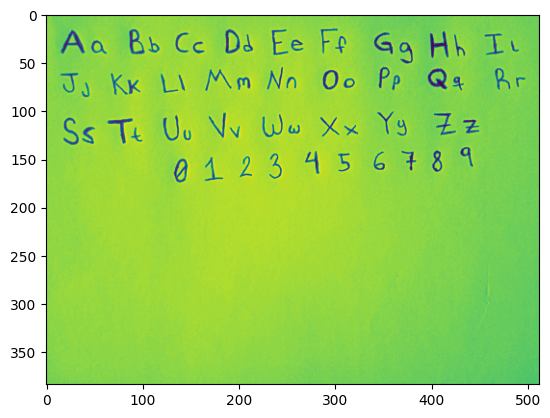

In [9]:
#Redimension de imagen
img=cv2.imread('/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/BASE1.jpg', 0)#'0' es para levantar la imagen en blanco y negro
scale_percent = 40
width = int(img.shape[1] * scale_percent / 100) 
height = int(img.shape[0] * scale_percent / 100) 
dim = (width, height) #dimension de la imagen
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
xm, ym = img.shape[:2] #valores de las dimensiones "x" y "y"
plt.imshow(img)

In [10]:
binarizacion()

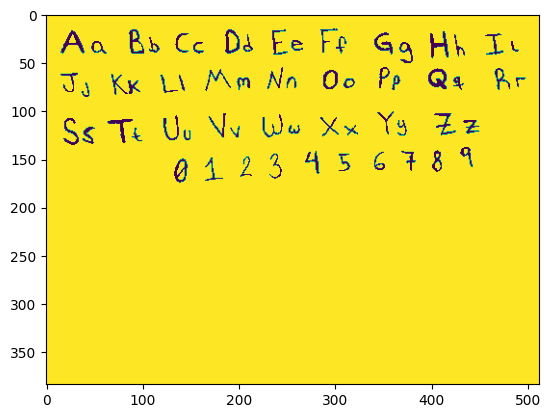

In [11]:
plt.imshow(img)

In [12]:
guardar()

[75, 75, 75, 75]
[163, 163, 163, 163]
[159, 159, 159, 159]
[109, 109, 109, 109]
[192, 192, 192, 192]
[200, 200, 200, 200]
[158, 158, 158, 158]
[75, 75, 75, 75]
[102, 102, 102, 102]
[58, 58, 58, 58]
[62, 62, 62, 62]
[50, 50, 50, 50]
[62, 62, 62, 62]
Out of index
[8, 8, 8, 8]
[65, 65, 65, 65]
[71, 71, 71, 71]
Out of index
[29, 29, 29, 29]
[50, 50, 50, 50]
[113, 113, 113, 113]
[92, 92, 92, 92]
[85, 85, 85, 85]
[208, 208, 208, 208]
[105, 105, 105, 105]
[80, 80, 80, 80]
[135, 135, 135, 135]
[86, 86, 86, 86]
[82, 82, 82, 82]
Out of index
[55, 55, 55, 55]
[36, 36, 36, 36]
[54, 54, 54, 54]
Out of index
[22, 22, 22, 22]
[46, 46, 46, 46]
[63, 63, 63, 63]
[77, 77, 77, 77]
Out of index
[31, 31, 31, 31]
[55, 55, 55, 55]
[77, 77, 77, 77]
[37, 37, 37, 37]
[68, 68, 68, 68]
[94, 94, 94, 94]
[139, 139, 139, 139]
[105, 105, 105, 105]
[115, 115, 115, 115]
[77, 77, 77, 77]
[139, 139, 139, 139]
[157, 157, 157, 157]
[53, 53, 53, 53]
[94, 94, 94, 94]
[48, 48, 48, 48]
Out of index
[4, 4, 4, 4]
[28, 28, 28, 28]